# Iris Classification using Machine Learning

### Importing Major Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
iris=pd.read_csv("IRIS.csv")

In [48]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [50]:
iris.shape

(150, 5)

## EDA

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Hence data is clean

### Univariate Analysis

(array([ 9., 23., 14., 27., 16., 26., 18.,  6.,  5.,  6.]),
 array([4.3 , 4.66, 5.02, 5.38, 5.74, 6.1 , 6.46, 6.82, 7.18, 7.54, 7.9 ]),
 <a list of 10 Patch objects>)

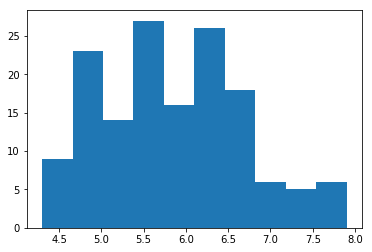

In [53]:
#Sepal_length
plt.hist(iris.sepal_length)

(array([ 4.,  7., 22., 24., 38., 31.,  9., 11.,  2.,  2.]),
 array([2.  , 2.24, 2.48, 2.72, 2.96, 3.2 , 3.44, 3.68, 3.92, 4.16, 4.4 ]),
 <a list of 10 Patch objects>)

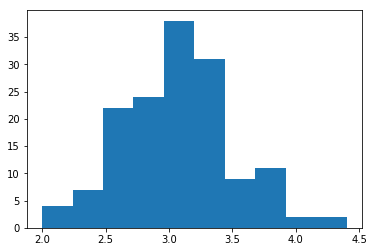

In [52]:
#Sepal_width
plt.hist(iris.sepal_width)

(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]), array([1.  , 1.59, 2.18, 2.77, 3.36, 3.95, 4.54, 5.13, 5.72, 6.31, 6.9 ]), <a list of 10 Patch objects>)


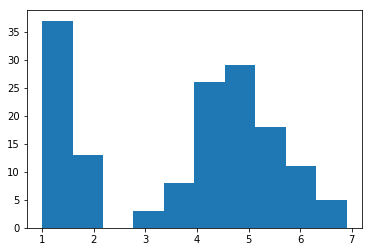

In [51]:
#Petal_lenth
print(plt.hist(iris.petal_length))


(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

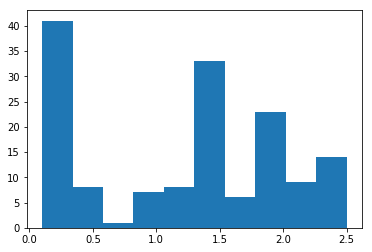

In [54]:
#Petal_widt
plt.hist(iris.petal_width)

### Bivariate Analysis

In [35]:
import seaborn as sns

AxesSubplot(0.125,0.125;0.775x0.755)


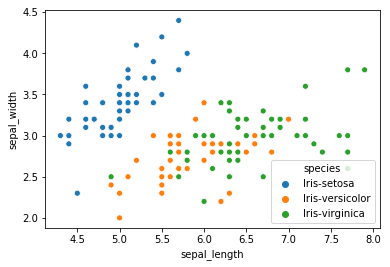

In [39]:
#Sepal_length and Sepal_width
print(sns.scatterplot(iris.sepal_length,iris.sepal_width,hue=iris.species))


AxesSubplot(0.125,0.125;0.775x0.755)


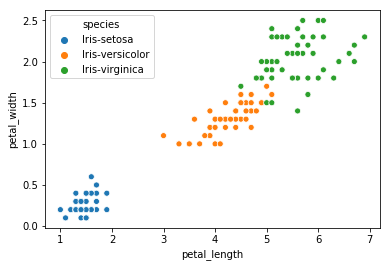

In [55]:
print(sns.scatterplot(iris.petal_length,iris.petal_width,hue=iris.species))

C:\Users\Amit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


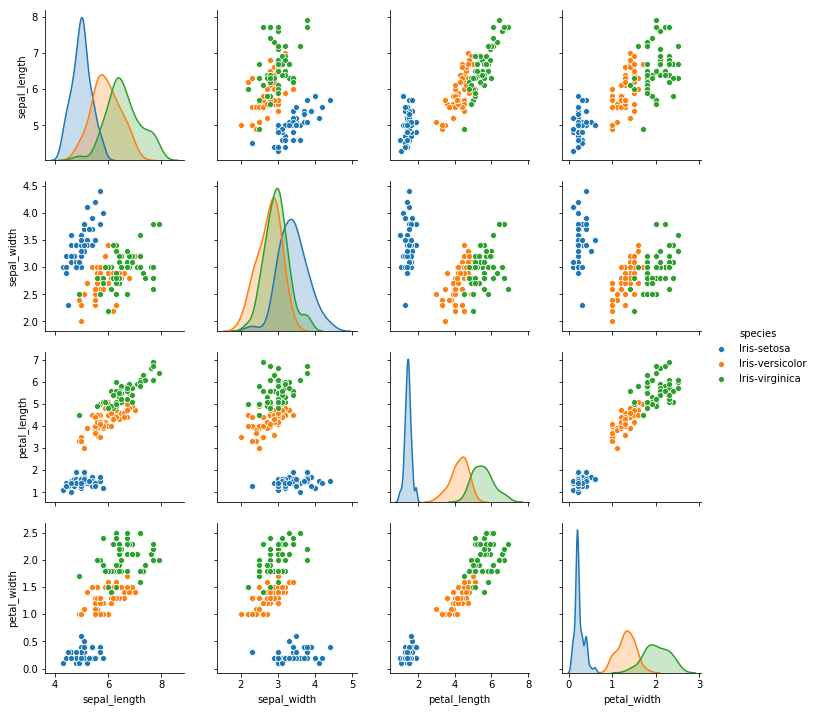

In [57]:
sns.pairplot(iris,hue="species")

### Observation: We observe that some features are separated in distinct manner but some are not so we can use decision Tree algorithm to classify the values

In [94]:
X=iris.iloc[:,0:4]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [95]:
y=iris.species
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

### Model Creation

In [96]:
from sklearn.tree import DecisionTreeClassifier

In [97]:
dtree=DecisionTreeClassifier(criterion='entropy')

In [98]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [99]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [100]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [101]:
X_test[0:1]

,sepal_length,sepal_width,petal_length,petal_width
58,6.6,2.9,4.6,1.3


In [102]:
pred=dtree.predict(X_test)

In [103]:
conf_matrix=confusion_matrix(y_test,pred)

In [104]:
conf_matrix

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  2,  7]], dtype=int64)

In [108]:
dtree.predict([[6.9,2.9,4.6,1.3]])

array(['Iris-versicolor'], dtype=object)

In [115]:
a=5.1
b=3.5
c=1.4
d=0.2
p=[[a,b,c,d]]
dtree.predict(p)

array(['Iris-setosa'], dtype=object)